# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

C:\Users\mkapil1\AppData\Local\Temp\ipykernel_2476\68620196.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2022-01-01", end="2024-12-31")["Close"]
[*********************100%***********************]  9 of 9 completed



📉 Raw AAPL Log Returns:
Shapiro-Wilk Statistic: 0.9727
P-value: 0.0000


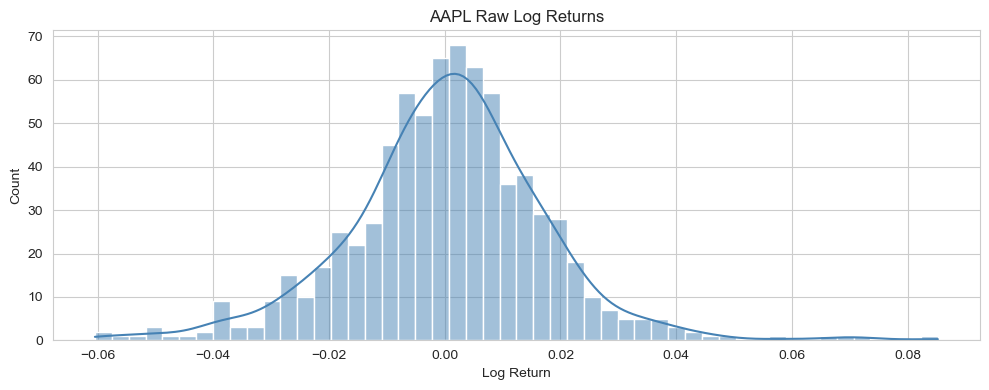


📗 Filtered AAPL Log Returns (2σ Removed):
Shapiro-Wilk Statistic: 0.9956
P-value: 0.1293


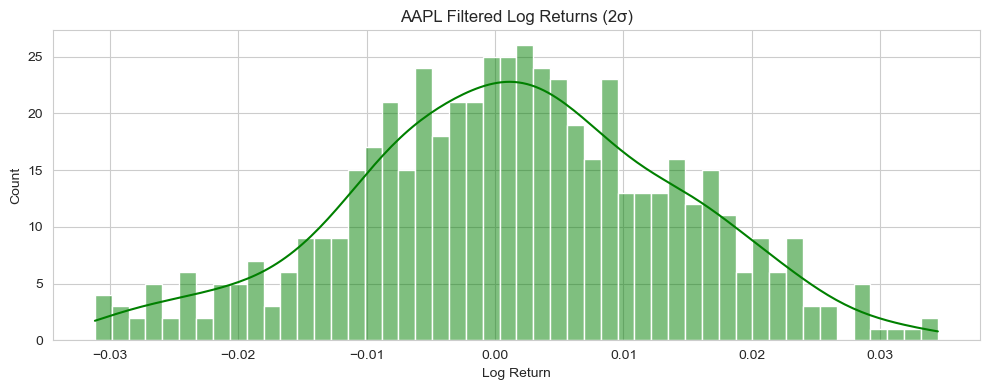


📈 Portfolio Log Returns (Filtered + Diversified, 2σ):
Shapiro-Wilk Statistic: 0.9979
P-value: 0.7250


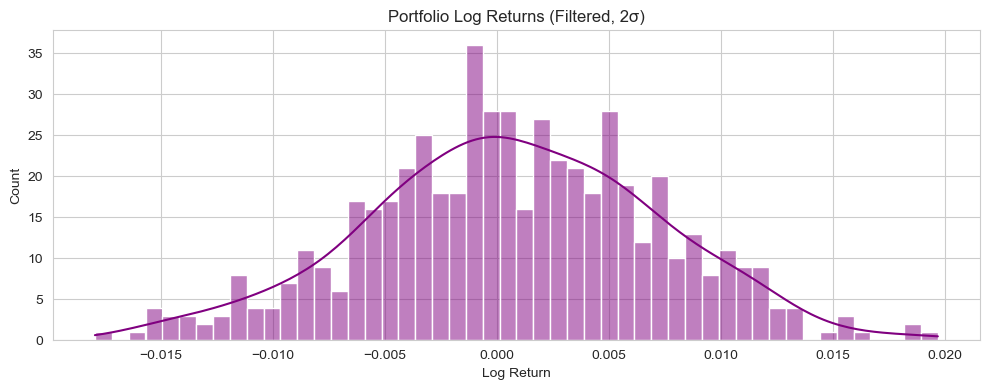

C:\Users\mkapil1\AppData\Local\Temp\ipykernel_2476\68620196.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data4 = yf.download(portfolio_tickers, start="2022-01-01", end="2024-12-31")["Close"]
[*********************100%***********************]  9 of 9 completed



📈 PART 4: Low-Risk Portfolio Log Returns (Filtered + Diversified, 2σ):
Shapiro-Wilk Statistic: 0.9985
P-value: 0.9281


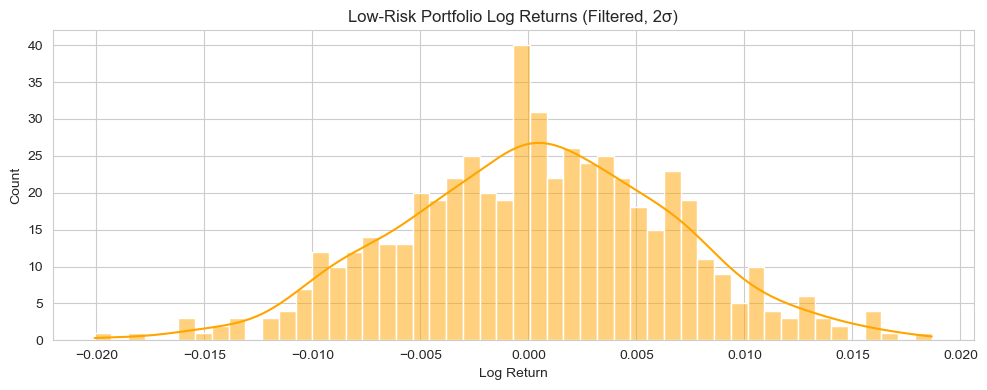

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# -----------------------------
#  PART 1 & 2 — AAPL Example Before and After Filtering (2σ)
# -----------------------------
tickers = ["AAPL", "MSFT", "GOOGL", "JNJ", "KO", "PG", "V", "UNH", "PEP"]
data = yf.download(tickers, start="2022-01-01", end="2024-12-31")["Close"]
log_returns = np.log(data / data.shift(1)).dropna()

sample = log_returns["AAPL"]
stat_raw, p_raw = shapiro(sample)
print("\n Raw AAPL Log Returns:")
print(f"Shapiro-Wilk Statistic: {stat_raw:.4f}")
print(f"P-value: {p_raw:.4f}")

plt.figure(figsize=(10, 4))
sns.histplot(sample, bins=50, kde=True, color='steelblue')
plt.title("AAPL Raw Log Returns")
plt.xlabel("Log Return")
plt.tight_layout()
plt.show()

# Filter log returns by removing values beyond 2σ
filtered = log_returns.copy()
for col in filtered.columns:
    mu = filtered[col].mean()
    sigma = filtered[col].std()
    filtered[col] = filtered[col].mask(np.abs(filtered[col] - mu) > 2 * sigma)
filtered = filtered.dropna()

filtered_sample = filtered["AAPL"]
stat_filt, p_filt = shapiro(filtered_sample)
print("\n Filtered AAPL Log Returns (2σ Removed):")
print(f"Shapiro-Wilk Statistic: {stat_filt:.4f}")
print(f"P-value: {p_filt:.4f}")

plt.figure(figsize=(10, 4))
sns.histplot(filtered_sample, bins=50, kde=True, color='green')
plt.title("AAPL Filtered Log Returns (2σ)")
plt.xlabel("Log Return")
plt.tight_layout()
plt.show()

# -----------------------------
#  PART 3 — Portfolio from Filtered Returns (2σ)
# -----------------------------
portfolio_returns = filtered.mean(axis=1)
stat_portfolio, p_portfolio = shapiro(portfolio_returns)
print("\n Portfolio Log Returns (Filtered + Diversified, 2σ):")
print(f"Shapiro-Wilk Statistic: {stat_portfolio:.4f}")
print(f"P-value: {p_portfolio:.4f}")

plt.figure(figsize=(10, 4))
sns.histplot(portfolio_returns, bins=50, kde=True, color='purple')
plt.title("Portfolio Log Returns (Filtered, 2σ)")
plt.xlabel("Log Return")
plt.tight_layout()
plt.show()

# -----------------------------
#  PART 4 — Portfolio from Specific Low-Risk Stocks (Same Process)
# -----------------------------
portfolio_tickers = ["JNJ", "PG", "KO", "PEP", "UNH", "MMM", "MSFT", "V", "HD"]
data4 = yf.download(portfolio_tickers, start="2022-01-01", end="2024-12-31")["Close"]
log_returns4 = np.log(data4 / data4.shift(1)).dropna()

# Remove 2σ outliers
filtered4 = log_returns4.copy()
for col in filtered4.columns:
    mu = filtered4[col].mean()
    sigma = filtered4[col].std()
    filtered4[col] = filtered4[col].mask(np.abs(filtered4[col] - mu) > 2 * sigma)
filtered4 = filtered4.dropna()

portfolio_returns4 = filtered4.mean(axis=1)
stat_portfolio4, p_portfolio4 = shapiro(portfolio_returns4)
print("\n PART 4: Low-Risk Portfolio Log Returns (Filtered + Diversified, 2σ):")
print(f"Shapiro-Wilk Statistic: {stat_portfolio4:.4f}")
print(f"P-value: {p_portfolio4:.4f}")

plt.figure(figsize=(10, 4))
sns.histplot(portfolio_returns4, bins=50, kde=True, color='orange')
plt.title("Low-Risk Portfolio Log Returns (Filtered, 2σ)")
plt.xlabel("Log Return")
plt.tight_layout()
plt.show()




## Effect of Removing Extremes on Normality

The raw log returns of AAPL show a low p-value and a Shapiro-Wilk statistic of 0.9727, indicating a clear departure from normality. After filtering out values beyond two standard deviations, the distribution becomes much closer to normal, with the p-value rising to 0.1293 and the statistic improving to 0.9956.

This trend continues at the portfolio level. The diversified portfolio built from the filtered returns of all selected stocks shows an even stronger fit, with a Shapiro-Wilk statistic of 0.9979 and a p-value of 0.7250. When the same process is applied to a specific low-risk portfolio, the result is even more normal-looking, with a statistic of 0.9985 and a p-value of 0.9281.

Removing outliers significantly improves the evidence of normality, especially when combined with diversification across multiple stable stocks.
